In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
from scipy.optimize import curve_fit

In [2]:
#read M82 template and radio galaxy sed template
dic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/'
arr=np.genfromtxt(dic+'M82_sed.txt',delimiter=',')
rg_sed_template=np.genfromtxt(dic+'rg_sed_template.txt')
spider_sed_flux=np.genfromtxt(dic+'spider_galaxy_sed.txt')


spider_sed_flux[:,1]=spider_sed_flux[:,1]/8.
wave,flux=arr[:,0]*u.AA,arr[:,1]*(10**25.2)*u.erg/(u.second*u.AA)
D=12.4*1000000*u.lyr

#convert luminosity to flux(mJy)
flux_wave=(flux/(4*np.pi*D**2))
flux_nu=flux_wave*(wave**2)/const.c
flux_nu=flux_nu.to(u.mJy).value
#flux_nu=flux_nu/flux_nu.max()
wave=wave.to(u.um).value*3.3



In [3]:
#MAMMOTH flux for different bands
wave_mammoth=np.array([0.36,0.51,0.79,1.1,
                       1.7,2.05,3.1,4.9,10.2,
                       20,450,850])
flux_mammoth=np.array([2.1*1e-4,7.6*1e-4,7.9*1e-4,
               30.9*1e-4,79.7*1e-4,113.4*1e-4,
               0.061,0.087,0.22,1.3,17,4.6])
err_mammoth=np.array([0.2e-4,0.4e-4,0.8e-4,2.8e-4,
                      5.1e-4,8.3e-4,0.004,0.008,
                      0.09,.9,10,.9])
#normalized flux
flux_mammoth_max=flux_mammoth.max()
flux_mammoth=flux_mammoth/flux_mammoth_max
err_mammoth=err_mammoth/flux_mammoth_max

flux_mammoth_optical=flux_mammoth[:6]
wave_mammoth_optical=wave_mammoth[:6]
err_mammoth_optical=err_mammoth[:6]

flux_mammoth_aw=flux_mammoth[6:10]
wave_mammoth_aw=wave_mammoth[6:10]
err_mammoth_aw=err_mammoth[6:10]

flux_mammoth_other=flux_mammoth[10:]
wave_mammoth_other=wave_mammoth[10:]
err_mammoth_other=err_mammoth[10:]

#upper limit for mammoth extimate from
#the continuum image of VLA and ALMA, FIRST catalog
flux_mammoth_up=np.array([5.046032e-2,3*2.17764965e-2])
wave_mammoth_up=np.array([8565.4988,1998.6163867])
wave_mammoth_first=np.array([214137.47])
flux_mammoth_first=np.array([0.9536333778926674])

#radio excess low limit
flux_mammoth_radiolow=0.12276521


#normalize upper limit
flux_mammoth_up=flux_mammoth_up/flux_mammoth_max
flux_mammoth_first=flux_mammoth_first/flux_mammoth_max
flux_mammoth_radiolow=flux_mammoth_radiolow/flux_mammoth_max

flux_mammoth

array([1.23529412e-05, 4.47058824e-05, 4.64705882e-05, 1.81764706e-04,
       4.68823529e-04, 6.67058824e-04, 3.58823529e-03, 5.11764706e-03,
       1.29411765e-02, 7.64705882e-02, 1.00000000e+00, 2.70588235e-01])

harrison 2014 SED

Calculate the SED template of radio excess galaxy 

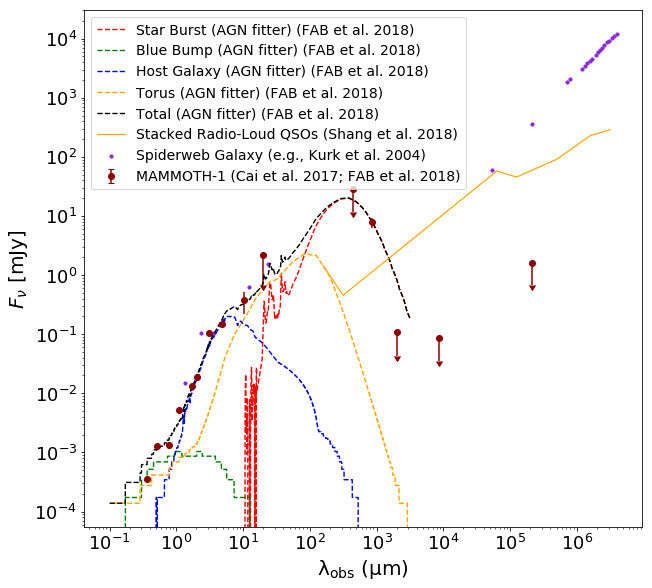

In [7]:
z=2.32
ratio_fnu= 28.76  # convert factor to change Shiwu's f_nor to F_nu [mJy]
dic= '/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/'
file= dic+ 'best_SEDs_1234.txt'
SED_AGN= np.genfromtxt(file)
freq_SED_rest= SED_AGN[:,0]
ratio=0.06
SBFnu= SED_AGN[:,1]*ratio*1.8 * ratio_fnu
BBFnu= SED_AGN[:,2]*ratio*1.0 * ratio_fnu
GAFnu= SED_AGN[:,3]*ratio     * ratio_fnu
TOFnu= SED_AGN[:,4]*ratio*0.8 * ratio_fnu
TOTALFnu= (SBFnu+ BBFnu + GAFnu + TOFnu) #SED_AGN[:,5]*ratio
lambda_SED= 3.e14 / 10**(freq_SED_rest)* (1+z)



fig,ax=plt.subplots(1,1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rc('legend', fontsize=14)
#ax.legend(loc=2, fontsize= 20, prop={'size': 19})
#plot M82 sed
#ax.plot(wave,flux_nu,lw=1.,color='black') #,label='M82 (Silva et al. 1998)')
#ax.plot(rg_sed_template[:,0]*(1+2.33),rg_sed_template[:,1]*0.02,
#        lw=1.,linestyle='dashed',color='peru',label='Radio galaxy (Toba et al. 2019)')


#plot AGN fitter SED: 
ax.plot(lambda_SED, SBFnu, lw=1.4, linestyle='--', \
        color='red',label='Star Burst (AGN fitter) (FAB et al. 2018)')
ax.plot(lambda_SED, BBFnu, lw=1.4, linestyle='--', \
        color='green',label='Blue Bump (AGN fitter) (FAB et al. 2018)')
ax.plot(lambda_SED, GAFnu, lw=1.4, linestyle='--', \
        color='blue',label='Host Galaxy (AGN fitter) (FAB et al. 2018)')
ax.plot(lambda_SED, TOFnu, lw=1.4, linestyle='--', \
        color='orange',label='Torus (AGN fitter) (FAB et al. 2018)')
ax.plot(lambda_SED, TOTALFnu, lw=1.4, linestyle='--', \
        color='black',label='Total (AGN fitter) (FAB et al. 2018)')

arr2=np.genfromtxt(dic+'stacked_radio_quiet.txt',delimiter=', ')
arr3=np.genfromtxt(dic+'stacked_radio_loud.txt',delimiter=', ')

z= 2.33
nu_quiet= 10**(arr2[:,0])
nuFnu_quiet= 10**(arr2[:,1])
lambda_quiet= 3.e14 / nu_quiet * (1+z) # unit: um 
Fnu_quiet = nuFnu_quiet/nu_quiet * 1.e12 # normalization factor 

nu_loud= 10**(arr3[:,0])
nuFnu_loud= 10**(arr3[:,1])
lambda_loud= 3.e14 / nu_loud * (1+z)
Fnu_loud = nuFnu_loud / nu_loud * 1.e12 * ratio_fnu # normalization factor 


lambda_loud2=lambda_loud[lambda_loud > 100]
Fnu_loud2= Fnu_loud[lambda_loud > 100]
ax.plot(lambda_loud2, Fnu_loud2, lw=1.2, color='orange',\
        label='Stacked Radio-Loud QSOs (Shang et al. 2018)')
#ax.plot(lambda_quiet, Fnu_quiet, lw=3, color='red')


ax.scatter(spider_sed_flux[:,0]*(3.3/3.1),spider_sed_flux[:,1] * ratio_fnu, s=10,
            color='blueviolet',label='Spiderweb Galaxy (e.g., Kurk et al. 2004)',
            marker='o')

ax.errorbar(wave_mammoth_optical,flux_mammoth_optical* ratio_fnu, marker='o',
            yerr=err_mammoth_optical,color='darkred',
            alpha=1,linestyle='none')


xerr=1000
yerr=0.2

ax.errorbar(wave_mammoth_aw,flux_mammoth_aw * ratio_fnu,
            uplims=np.array([0,0,0,1],dtype=bool),yerr=err_mammoth_aw * ratio_fnu,
            color='darkred',marker='o',alpha=1,linestyle='none', 
            label='MAMMOTH-1 (Cai et al. 2017; FAB et al. 2018)')
ax.errorbar(wave_mammoth_other,flux_mammoth_other * ratio_fnu,marker='o',
            yerr=err_mammoth_other * ratio_fnu, color='darkred',alpha=1,
            uplims=np.array([1,0],dtype=bool),
            linestyle='none')
ax.errorbar(wave_mammoth_up,flux_mammoth_up* ratio_fnu, 
            yerr=np.array([3e-2,4e-2])/flux_mammoth_max * ratio_fnu,
            uplims=np.array([1,1],dtype=bool), #xerr=xerr,
            color='darkred',alpha=1,marker='o',
            linestyle='none')
#ax.errorbar(np.array([214137.47]),flux_14_harr,
#            yerr=err_14_harr,color='gray',marker='s',
#            linestyle='none',lw=10)
ax.errorbar(wave_mammoth_first,flux_mammoth_first* ratio_fnu,
            yerr=wave_mammoth_first*1.5e-7 * ratio_fnu,
            uplims=np.array([1],dtype=bool),
            color='darkred',alpha=1,marker='o',
            linestyle='none')

#ax.xticks(fontsize=14)
#ax.yticks(fontsize=14)
ax.minorticks_on()
ax.set_xlabel(r'$\rm \lambda_{obs} \ (\mu m)$',fontsize=20)
ax.set_ylabel(r'$F_\nu\ [\rm mJy]$',fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
#ax.yaxis.get_ticklocs(minor=True)     # []
plt.legend(loc='upper left')
dicf='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/draft_code/paper/ApJtemplate/figs/'
plt.rcParams['figure.figsize'] = [10, 9.5]
plt.savefig(dicf+'SED_fitting.png',dpi=300)
# plt.show()
